In [17]:
# rpart is to create the tree and classify the data according to data
# import xlsx to import the .xlsx file

library(rpart.plot)
library(xlsx)
EnergyE_train <- read.xlsx("C://Users//Mayur//Documents//Advance Data Science//Assignments_SDas//Assignment_3//Energy_Efficiency//Energy Efficiency ENB2012_data.xlsx", sheetIndex = 1, as.data.frame = TRUE)
summary(EnergyE_train)

Warning message:
"package 'rpart.plot' was built under R version 3.4.2"Loading required package: rpart


       X1               X2              X3              X4       
 Min.   :0.6200   Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825   1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500   Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642   Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300   3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800   Max.   :808.5   Max.   :416.5   Max.   :220.5  
 NA's   :528      NA's   :528     NA's   :528     NA's   :528    
       X5             X6             X7               X8              Y1       
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000   Min.   : 6.01  
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750   1st Qu.:12.99  
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000   Median :18.95  
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812   Mean   :22.31  
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000   3rd Qu.:

In [18]:
#Clean the dataset by subsetting 
EnergyE_train <- EnergyE_train[0:768,]

# select the dataframe by excluding last column NA
EnergyE_train <- subset( EnergyE_train, select = -NA.)

EnergyE_train

X1   X2    X3    X4     X5  X6  X7  X8  Y1    Y2   
1   0.98 514.5 294.0 110.25 7.0 2   0   0   15.55 21.33
2   0.98 514.5 294.0 110.25 7.0 3   0   0   15.55 21.33
3   0.98 514.5 294.0 110.25 7.0 4   0   0   15.55 21.33
4   0.98 514.5 294.0 110.25 7.0 5   0   0   15.55 21.33
5   0.90 563.5 318.5 122.50 7.0 2   0   0   20.84 28.28
6   0.90 563.5 318.5 122.50 7.0 3   0   0   21.46 25.38
7   0.90 563.5 318.5 122.50 7.0 4   0   0   20.71 25.16
8   0.90 563.5 318.5 122.50 7.0 5   0   0   19.68 29.60
9   0.86 588.0 294.0 147.00 7.0 2   0   0   19.50 27.30
10  0.86 588.0 294.0 147.00 7.0 3   0   0   19.95 21.97
11  0.86 588.0 294.0 147.00 7.0 4   0   0   19.34 23.49
12  0.86 588.0 294.0 147.00 7.0 5   0   0   18.31 27.87
13  0.82 612.5 318.5 147.00 7.0 2   0   0   17.05 23.77
14  0.82 612.5 318.5 147.00 7.0 3   0   0   17.41 21.46
15  0.82 612.5 318.5 147.00 7.0 4   0   0   16.95 21.16
16  0.82 612.5 318.5 147.00 7.0 5   0   0   15.98 24.93
17  0.79 637.0 343.0 147.00 7.0 2   0   0   28.52 37.73
18  0.79 637.0 343.0 147.00 7.0 3   0   0   29.90 31.27
19  0.79 637.0 343.0 147.00 7.0 4   0   0   29.63 30.93
20  0.79 637.0 343.0 147.00 7.0 5   0   0   28.75 39.44
21  0.76 661.5 416.5 122.50 7.0 2   0   0   24.77 29.79
22  0.76 661.5 416.5 122.50 7.0 3   0   0   23.93 29.68
23  0.76 661.5 416.5 122.50 7.0 4   0   0   24.77 29.79
24  0.76 661.5 416.5 122.50 7.0 5   0   0   23.93 29.40
25  0.74 686.0 245.0 220.50 3.5 2   0   0    6.07 10.90
26  0.74 686.0 245.0 220.50 3.5 3   0   0    6.05 11.19
27  0.74 686.0 245.0 220.50 3.5 4   0   0    6.01 10.94
28  0.74 686.0 245.0 220.50 3.5 5   0   0    6.04 11.17
29  0.71 710.5 269.5 220.50 3.5 2   0   0    6.37 11.27
30  0.71 710.5 269.5 220.50 3.5 3   0   0    6.40 11.72
... ...  ...   ...   ...    ... ... ... ... ...   ...  
739 0.79 637.0 343.0 147.0  7.0 4   0.4 5   41.09 47.01
740 0.79 637.0 343.0 147.0  7.0 5   0.4 5   40.79 44.87
741 0.76 661.5 416.5 122.5  7.0 2   0.4 5   38.82 39.37
742 0.76 661.5 416.5 122.5  7.0 3   0.4 5   39.72 39.80
743 0.76 661.5 416.5 122.5  7.0 4   0.4 5   39.31 37.79
744 0.76 661.5 416.5 122.5  7.0 5   0.4 5   39.86 38.18
745 0.74 686.0 245.0 220.5  3.5 2   0.4 5   14.41 16.69
746 0.74 686.0 245.0 220.5  3.5 3   0.4 5   14.19 16.62
747 0.74 686.0 245.0 220.5  3.5 4   0.4 5   14.17 16.94
748 0.74 686.0 245.0 220.5  3.5 5   0.4 5   14.39 16.70
749 0.71 710.5 269.5 220.5  3.5 2   0.4 5   12.43 15.59
750 0.71 710.5 269.5 220.5  3.5 3   0.4 5   12.63 14.58
751 0.71 710.5 269.5 220.5  3.5 4   0.4 5   12.76 15.33
752 0.71 710.5 269.5 220.5  3.5 5   0.4 5   12.42 15.31
753 0.69 735.0 294.0 220.5  3.5 2   0.4 5   14.12 16.63
754 0.69 735.0 294.0 220.5  3.5 3   0.4 5   14.28 15.87
755 0.69 735.0 294.0 220.5  3.5 4   0.4 5   14.37 16.54
756 0.69 735.0 294.0 220.5  3.5 5   0.4 5   14.21 16.74
757 0.66 759.5 318.5 220.5  3.5 2   0.4 5   14.96 17.64
758 0.66 759.5 318.5 220.5  3.5 3   0.4 5   14.92 17.79
759 0.66 759.5 318.5 220.5  3.5 4   0.4 5   14.92 17.55
760 0.66 759.5 318.5 220.5  3.5 5   0.4 5   15.16 18.06
761 0.64 784.0 343.0 220.5  3.5 2   0.4 5   17.69 20.82
762 0.64 784.0 343.0 220.5  3.5 3   0.4 5   18.19 20.21
763 0.64 784.0 343.0 220.5  3.5 4   0.4 5   18.16 20.71
764 0.64 784.0 343.0 220.5  3.5 5   0.4 5   17.88 21.40
765 0.62 808.5 367.5 220.5  3.5 2   0.4 5   16.54 16.88
766 0.62 808.5 367.5 220.5  3.5 3   0.4 5   16.44 17.11
767 0.62 808.5 367.5 220.5  3.5 4   0.4 5   16.48 16.61
768 0.62 808.5 367.5 220.5  3.5 5   0.4 5   16.64 16.03

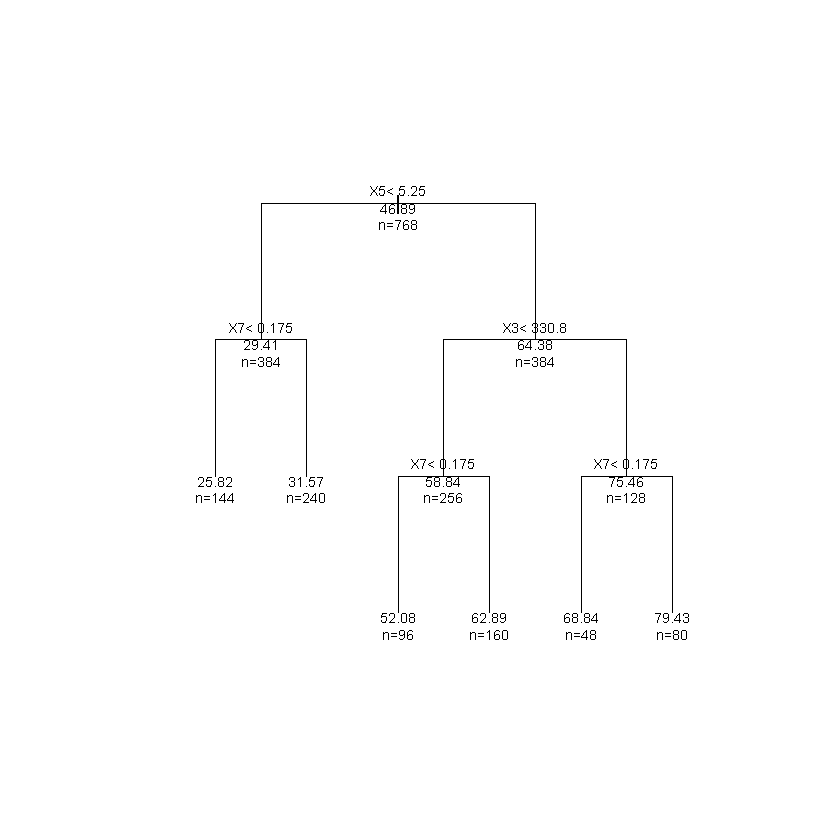

In [22]:
#Classification and regression trees (as described by Brieman, Freidman, Olshen, and Stone) can be generated through the rpart package. 

my_tree <- rpart(Y1 + Y2 ~ X1 + X2+ X3+ X4+ X5 + X6 + X7 + X8, data = EnergyE_train, method = "anova")
plot(my_tree, uniform=TRUE,margin=0.2)
text(my_tree, use.n=TRUE, all=TRUE, cex=.7)